In [1]:
from mcspace.utils import pickle_load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np

from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu
from fig_utils import *

In [2]:
# change font
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [3]:
pwd

'C:\\Users\\Gary2\\Partners HealthCare Dropbox\\Gurdip Uppal\\research_bwh\\MCSPACE_FINAL\\MCSPACE\\mcspace\\paper\\figures'

In [4]:
ls

 Volume in drive C is OS
 Volume Serial Number is 5E7E-789E

 Directory of C:\Users\Gary2\Partners HealthCare Dropbox\Gurdip Uppal\research_bwh\MCSPACE_FINAL\MCSPACE\mcspace\paper\figures

08/26/2024  01:06 PM    <DIR>          .
08/21/2024  12:35 PM    <DIR>          ..
08/26/2024  10:28 AM    <DIR>          .ipynb_checkpoints
08/25/2024  07:43 AM    <DIR>          __pycache__
08/25/2024  10:24 AM    <DIR>          _tmp_sub
08/21/2024  12:55 PM    <DIR>          data_figs
08/21/2024  12:55 PM           236,342 data_filtering.ipynb
08/25/2024  07:42 AM             6,265 fig_utils.py
08/25/2024  08:15 AM    <DIR>          figs_benchmarking_results
08/23/2024  01:52 PM    <DIR>          figs_cv
08/26/2024  01:04 PM    <DIR>          figs_datastats
08/21/2024  01:23 PM    <DIR>          figs_human_results
08/25/2024  02:48 PM    <DIR>          figs_mouse_results
08/25/2024  02:50 PM           212,974 render_association_changes.ipynb
08/25/2024  08:17 AM           354,812 render_benchmarki

# Paths

In [5]:
basepath = Path("./")
rootpath = Path("../../")

In [6]:
outpath = basepath / "figs_benchmarking_results"
outpath.mkdir(exist_ok=True, parents=True)

In [7]:
pwpath = rootpath / "paper" / "benchmarking" / "pairwise"
mcpwpath = pwpath / "mcspace_results"
fishpwpath = pwpath / "fisher_results"
ecopwpath = pwpath / "ecosim_eval_results"
arpath = rootpath / "paper" / "benchmarking" / "assemblage_recovery"
arrespath = arpath / "eval_results"

# Load pairwise results

In [8]:
fishpwres = pd.DataFrame(pickle_load(fishpwpath / "results.pkl"))
mcpwres = pd.DataFrame(pickle_load(mcpwpath / "results.pkl"))
ecopwres = pd.DataFrame(pickle_load(ecopwpath / "results.pkl"))

In [9]:
# combine results
pwres = pd.concat([mcpwres, fishpwres, ecopwres])

# rename column
pwres=pwres.rename(columns={'garbage weight': 'contamination weight'})

# Load assemblage recovery results

In [10]:
arres = pd.DataFrame(pickle_load(arrespath / "results.pkl"))

# Add number clusters error

In [11]:
nk_default = 15
nrows, ncols = arres.shape

nk_error = []
for i in range(nrows):
    true_nk = arres.loc[i,'number clusters']
    if true_nk == "default":
        true_nk = nk_default
    model_nk = arres.loc[i,'number clusters learned']
    err = model_nk - true_nk
    nk_error.append(err)

arres['nk_error'] = nk_error

# Plot

In [12]:
pw_model_order = ['mcspace', 'fisher', 'SIM9']
# pw_palette = ['tab:blue', 'tab:orange', 'tab:green']
pw_palette = [sns.color_palette("Paired")[i] for i in [0,2,3]]
ar_model_order = ['mcspace', 'gmm_basic']
# ar_palette = ['tab:blue', 'tab:red']
ar_palette = [sns.color_palette("Paired")[i] for i in [0,6]]

label_x = -0.35
label_y = 1.0

In [13]:
pwres

,model,base_sample,number particles,read depth,number clusters,contamination weight,number subjects,dataset,auc
0,mcspace,Mouse,default,default,5,default,default,0,0.992675
1,mcspace,Mouse,default,default,10,default,default,0,0.996858
2,mcspace,Mouse,default,default,15,default,default,0,0.937290
3,mcspace,Mouse,default,default,20,default,default,0,0.957784
4,mcspace,Mouse,default,default,25,default,default,0,0.853521
...,...,...,...,...,...,...,...,...,...
445,SIM9,Human,default,default,default,0.0,default,9,0.761975
446,SIM9,Human,default,default,default,0.025,default,9,0.756585
447,SIM9,Human,default,default,default,0.05,default,9,0.756284
448,SIM9,Human,default,default,default,0.075,default,9,0.743493


## mouse results

In [14]:
base_sample='Mouse'
cases = ['number particles', 'read depth', 'number clusters', 'contamination weight', 'number subjects']

C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\2553658654.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\2553658654.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\2553658654.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\2553658654.py:25: UserWarning: set_ticklabels() should only be used with a fixed number o

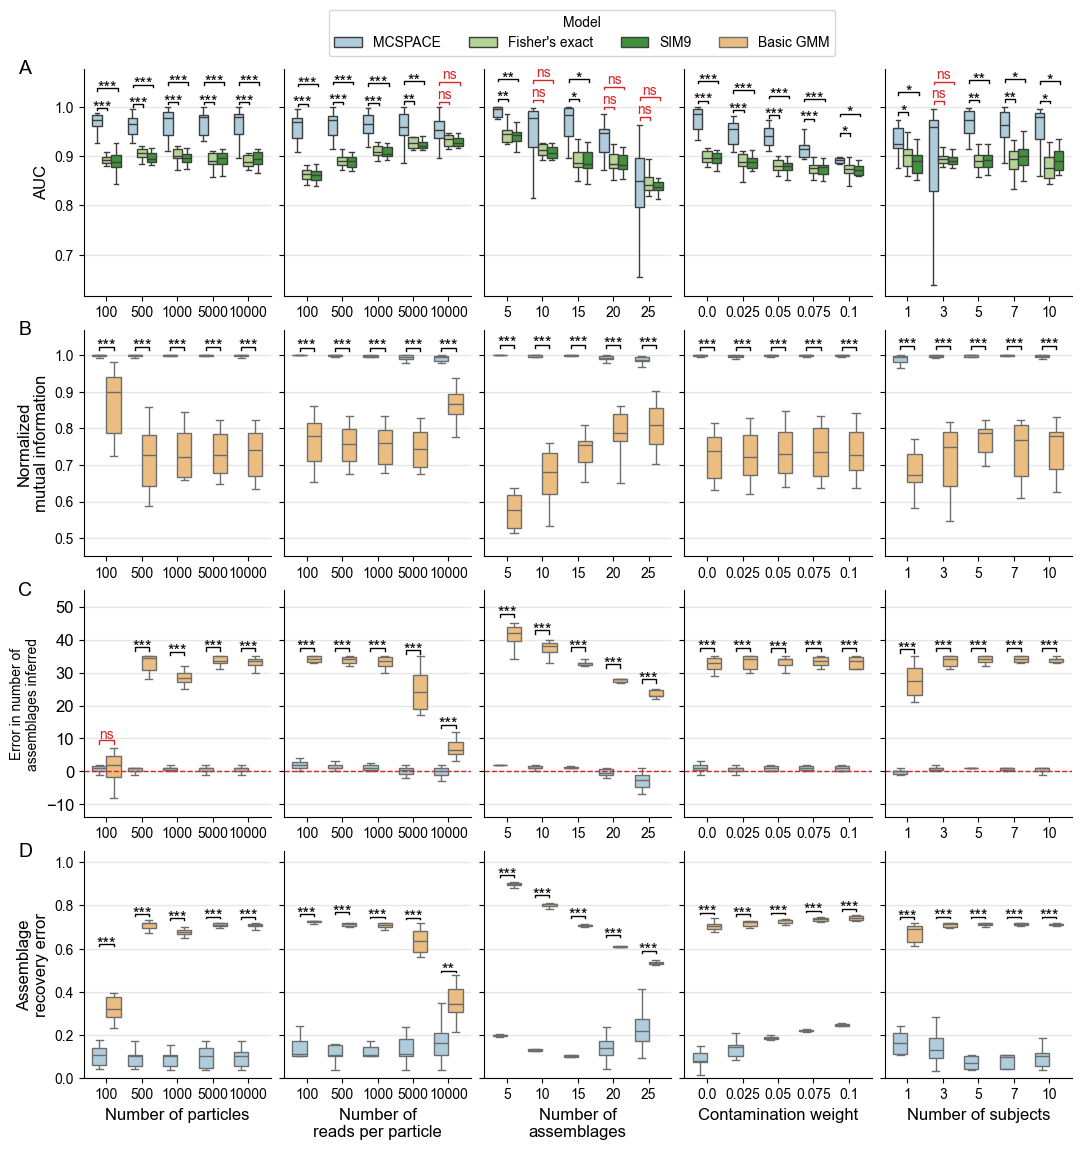

In [15]:
fontsize=12
label_fontsize=14
ticklabel_fontsize=10
rotation=0

scale = 1.5
fig = plt.figure(figsize=(scale*8.5,scale*11))
gs = fig.add_gridspec(ncols=1,nrows=5, hspace=0.15)

wspace = 0.07
ncols = len(cases)
gspw, axpw = make_sub_gs_ax(fig,gs,0,0,ncols,wspace)
gsnmi, axnmi = make_sub_gs_ax(fig,gs,1,0,ncols,wspace)
gsnk, axnk = make_sub_gs_ax(fig,gs,2,0,ncols,wspace)
gsar, axar = make_sub_gs_ax(fig,gs,3,0,ncols,wspace)



# plot pairwise results ======================================
axpw = plot_results(axpw, pwres, cases, 'auc', pw_model_order, pw_palette, base_sample, 
                    width=1.0/7.0, offset=0.04, text_h=-0.007, h=0.005, ns_h_shift=-0.015)
axpw = share_axes(axpw,ncols)
for idx, ax in enumerate(axpw):
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
#     ax.set_ylim(0.70,1.048)
# #     if idx == 0:
#     ax.set_yticks(np.arange(0.70,1.01,0.05))
# #     else:
# #         ax.set_yticks([])
    ax=box_to_ell_axes(ax)
axpw[0].set_ylabel("AUC", fontsize=fontsize)
axpw[0].set_yticklabels(axpw[0].get_yticklabels(), fontsize=ticklabel_fontsize)
axpw[0].text(label_x, label_y, 'A', horizontalalignment='left',verticalalignment='center', 
             transform=axpw[0].transAxes, fontsize=label_fontsize)

# plot NMI results ======================================
axnmi = plot_results(axnmi, arres, cases, 'NMI', ar_model_order, ar_palette, base_sample, text_h=-0.005)
axnmi = share_axes(axnmi,ncols)
for ax in axnmi:
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(0.45,1.07)
    ax=box_to_ell_axes(ax)
axnmi[0].set_ylabel("Normalized\nmutual information", fontsize=fontsize)
axnmi[0].set_yticklabels(axnmi[0].get_yticklabels(), fontsize=ticklabel_fontsize)
axnmi[0].text(label_x, label_y, 'B', horizontalalignment='left',verticalalignment='center', transform=axnmi[0].transAxes, fontsize=label_fontsize)

# plot nk err results ======================================
axnk = plot_results(axnk, arres, cases, 'nk_error', ar_model_order, ar_palette, base_sample, h=1.1, text_h=-0.5, ns_h_shift=-1.5)
for ax in axnk:
    ax.axhline(y=0, color='tab:red', linestyle='--', linewidth=1)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(-14,55)
    ax=box_to_ell_axes(ax)
axnk = share_axes_r(axnk,ncols)
axnk[0].set_ylabel("Error in number of\nassemblages inferred", fontsize=ticklabel_fontsize)
axnk[0].set_yticklabels(axnk[0].get_yticklabels(), fontsize=fontsize)
axnk[0].text(label_x, label_y, 'C', horizontalalignment='left',verticalalignment='center', transform=axnk[0].transAxes, fontsize=label_fontsize)

# plot comm err results ======================================
axar = plot_results(axar, arres, cases, 'community error', ar_model_order, ar_palette, base_sample, text_h=-0.02)
axar = share_axes(axar,ncols)
axar[0].set_xlabel("Number of particles", fontsize=fontsize)
axar[1].set_xlabel("Number of\nreads per particle", fontsize=fontsize)
axar[2].set_xlabel("Number of\nassemblages", fontsize=fontsize)
axar[3].set_xlabel("Contamination weight", fontsize=fontsize)
axar[4].set_xlabel("Number of subjects", fontsize=fontsize)
axar[0].set_ylabel("Assemblage\nrecovery error", fontsize=fontsize)
for ax in axar:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(0,1.05)
    ax=box_to_ell_axes(ax)
axar[0].set_yticklabels(axar[0].get_yticklabels(), fontsize=ticklabel_fontsize)
axar[0].text(label_x, label_y, 'D', horizontalalignment='left',verticalalignment='center', transform=axar[0].transAxes, fontsize=label_fontsize)

# legend ===================================================
lines_labels = [axpw[0].get_legend_handles_labels(), axnmi[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
mod_sub = [0,1,2,4]
# mod_sub = [0,1,3]
lines = [lines[i] for i in mod_sub]
labels = [labels[i] for i in mod_sub]

labels = ['MCSPACE', "Fisher's exact", 'SIM9', 'Basic GMM']
# labels = ['MCSPACE', "Fisher's exact", 'Basic GMM']
fig.legend(lines, labels, title='Model', loc='upper right', bbox_to_anchor=(0.72,0.92), ncol=4)

plt.savefig(outpath / f"figure_semisynthetic_{base_sample}.png", bbox_inches="tight")

## Human results

In [16]:
base_sample = 'Human'
cases = ['number particles', 'read depth', 'number clusters', 'contamination weight']

C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\3845515948.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\3845515948.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\3845515948.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_19732\3845515948.py:23: UserWarning: set_ticklabels() should only be used with a fixed number o

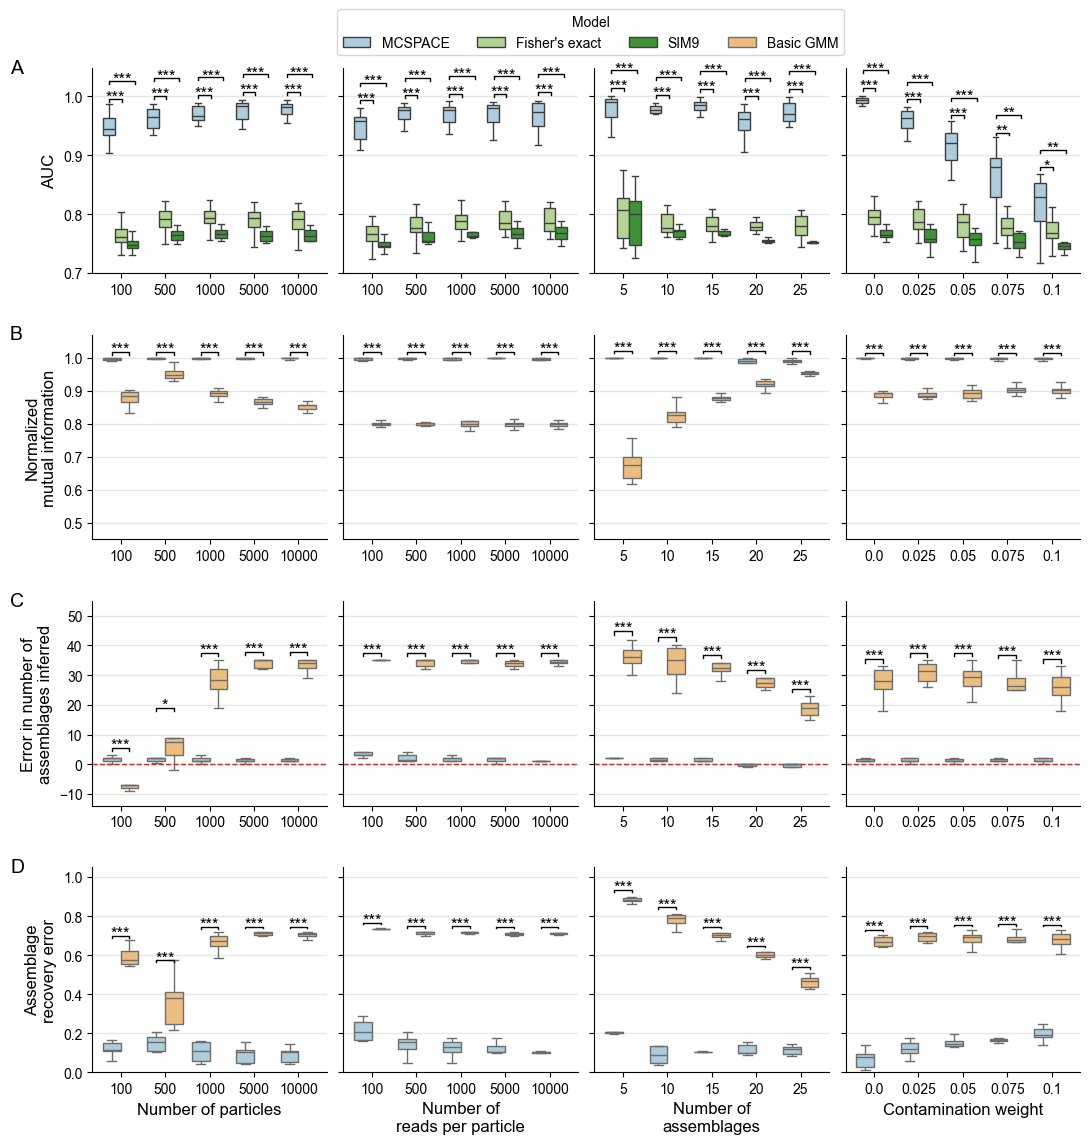

In [17]:
fontsize=12
label_fontsize=14
ticklabel_fontsize=10
rotation=0

scale = 1.5
fig = plt.figure(figsize=(scale*8.5,scale*11))
gs = fig.add_gridspec(ncols=1,nrows=5, hspace=0.3)

wspace = 0.07
ncols = len(cases)
gspw, axpw = make_sub_gs_ax(fig,gs,0,0,ncols,wspace)
gsnmi, axnmi = make_sub_gs_ax(fig,gs,1,0,ncols,wspace)
gsnk, axnk = make_sub_gs_ax(fig,gs,2,0,ncols,wspace)
gsar, axar = make_sub_gs_ax(fig,gs,3,0,ncols,wspace)

# plot pairwise results ======================================
axpw = plot_results(axpw, pwres, cases, 'auc', pw_model_order, pw_palette, base_sample, 
                    width=1.0/7.0, text_h=-0.003, h=0.005, offset=0.03, ns_h_shift=-0.01)
axpw = share_axes(axpw,ncols)
for ax in axpw:
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(0.70,1.048)
    ax.set_yticks(np.arange(0.70,1.001,0.1))
    ax=box_to_ell_axes(ax)
axpw[0].set_ylabel("AUC", fontsize=fontsize)
axpw[0].set_yticklabels(axpw[0].get_yticklabels(), fontsize=ticklabel_fontsize)
# for i in range(1,len(axpw)):
#     axpw[i].set_yticklabels("")
# axpw[0].set_yticklabels(np.arange(0.70,1.001,0.05), fontsize=fontsize)
axpw[0].text(label_x, label_y, 'A', horizontalalignment='left',verticalalignment='center', transform=axpw[0].transAxes, fontsize=label_fontsize)

# plot NMI results ======================================
axnmi = plot_results(axnmi, arres, cases, 'NMI', ar_model_order, ar_palette, base_sample, text_h=-0.003)
axnmi = share_axes(axnmi,ncols)
for ax in axnmi:
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(0.45,1.07)
    ax=box_to_ell_axes(ax)
axnmi[0].set_ylabel("Normalized\nmutual information", fontsize=fontsize)
axnmi[0].set_yticklabels(axnmi[0].get_yticklabels(), fontsize=ticklabel_fontsize)
axnmi[0].text(label_x, label_y, 'B', horizontalalignment='left',verticalalignment='center', transform=axnmi[0].transAxes, fontsize=label_fontsize)

# plot nk err results ======================================
axnk = plot_results(axnk, arres, cases, 'nk_error', ar_model_order, ar_palette, base_sample, h=1.1, text_h=0)
for ax in axnk:
    ax.axhline(y=0, color='tab:red', linestyle='--', linewidth=1)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(-14,55)
    ax=box_to_ell_axes(ax)
axnk = share_axes_r(axnk,ncols)
axnk[0].set_ylabel("Error in number of\nassemblages inferred", fontsize=fontsize)
axnk[0].set_yticklabels(axnk[0].get_yticklabels(), fontsize=ticklabel_fontsize)
axnk[0].text(label_x, label_y, 'C', horizontalalignment='left',verticalalignment='center', transform=axnk[0].transAxes, fontsize=label_fontsize)

# plot comm err results ======================================
axar = plot_results(axar, arres, cases, 'community error', ar_model_order, ar_palette, base_sample, text_h=-0.015)
axar = share_axes(axar,ncols)
axar[0].set_xlabel("Number of particles", fontsize=fontsize)
axar[1].set_xlabel("Number of\nreads per particle", fontsize=fontsize)
axar[2].set_xlabel("Number of\nassemblages", fontsize=fontsize)
axar[3].set_xlabel("Contamination weight", fontsize=fontsize)
# axar[4].set_xlabel("Number of subjects", fontsize=fontsize)
axar[0].set_ylabel("Assemblage\nrecovery error", fontsize=fontsize)
for ax in axar:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticklabel_fontsize, rotation=rotation)
    ax.set_ylim(0,1.05)
    ax=box_to_ell_axes(ax)
axar[0].set_yticklabels(axar[0].get_yticklabels(), fontsize=ticklabel_fontsize)
axar[0].text(label_x, label_y, 'D', horizontalalignment='left',verticalalignment='center', transform=axar[0].transAxes, fontsize=label_fontsize)

# legend ===================================================
lines_labels = [axpw[0].get_legend_handles_labels(), axnmi[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
mod_sub = [0,1,2,4]
# mod_sub = [0,1,3]
lines = [lines[i] for i in mod_sub]
labels = [labels[i] for i in mod_sub]

labels = ['MCSPACE', "Fisher's exact", 'SIM9', 'Basic GMM']
# labels = ['MCSPACE', "Fisher's exact", 'Basic GMM']
fig.legend(lines, labels, title='Model', loc='upper right', bbox_to_anchor=(0.72,0.92), ncol=4)

plt.savefig(outpath / f"figure_semisynthetic_{base_sample}.png", bbox_inches="tight")